# ~Phân Tích Tương Tác Qua Reaction, Comment, Share~ 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import ast
from datetime import datetime
from matplotlib.dates import DateFormatter
import json
import matplotlib.cm as cm

## I. Phân tích các lượt Reactions

In [3]:
reaction_df = pd.read_csv('CleanFile/SpaceSpeakersCM_Reaction.csv')
reaction_df

,index,post_id,post_text,date,reaction_count,comments,shares,like,love,haha,wow,care,angry,sad
0,1,910863380635703,TRÒN 1 NĂM DIỄN RA KOSMIK 💥☄️\nMột trải nghiệm...,2023-11-12,567,6,6,446,111,1.0,3.0,6.0,0.0,0.0
1,2,907540044301370,"Space bois & Space girls,\nIts Maroon 5 🔥🔥🔥\nS...",2023-11-05,445,4,0,376,63,0.0,4.0,2.0,0.0,0.0
2,3,906705411051500,'Đan Xinh In Love' = Nhật kí tình Đan 💕\n\n#Bi...,2023-11-03,548,3,21,490,51,2.0,0.0,4.0,1.0,0.0
3,4,906220787766629,Make Binz Da Poet feel loved 💗\n\n#Binz #Touli...,2023-11-02,1884,26,59,1681,186,7.0,1.0,8.0,1.0,0.0
4,5,906176837771024,It's Xuân Đan's world and we're just living in...,2023-11-02,141,2,0,116,23,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,811294883925887,Space Date 3 sẵn sàng vào cuối tuần này 🌪\n\nH...,2023-05-16,458,29,9,333,117,1.0,2.0,5.0,0.0,0.0
96,97,811306187258090,Một sự kết hợp lần đầu tiên 🎸\n\nTouliver x $A...,2023-05-16,4451,74,51,3698,701,5.0,20.0,27.0,0.0,0.0
97,98,810742723981103,Space Jam Volume 01 - Album Release Event Reca...,2023-05-15,1899,5,6,1792,101,1.0,0.0,5.0,0.0,0.0
98,99,810747570647285,Space Date #3 is coming ☄️🌪🔥🌟\nNext stop: KTX ...,2023-05-15,1247,75,11,951,269,0.0,13.0,12.0,1.0,1.0


1. Phân tích sự phát triển lượt Reactions

<Axes: xlabel='index'>

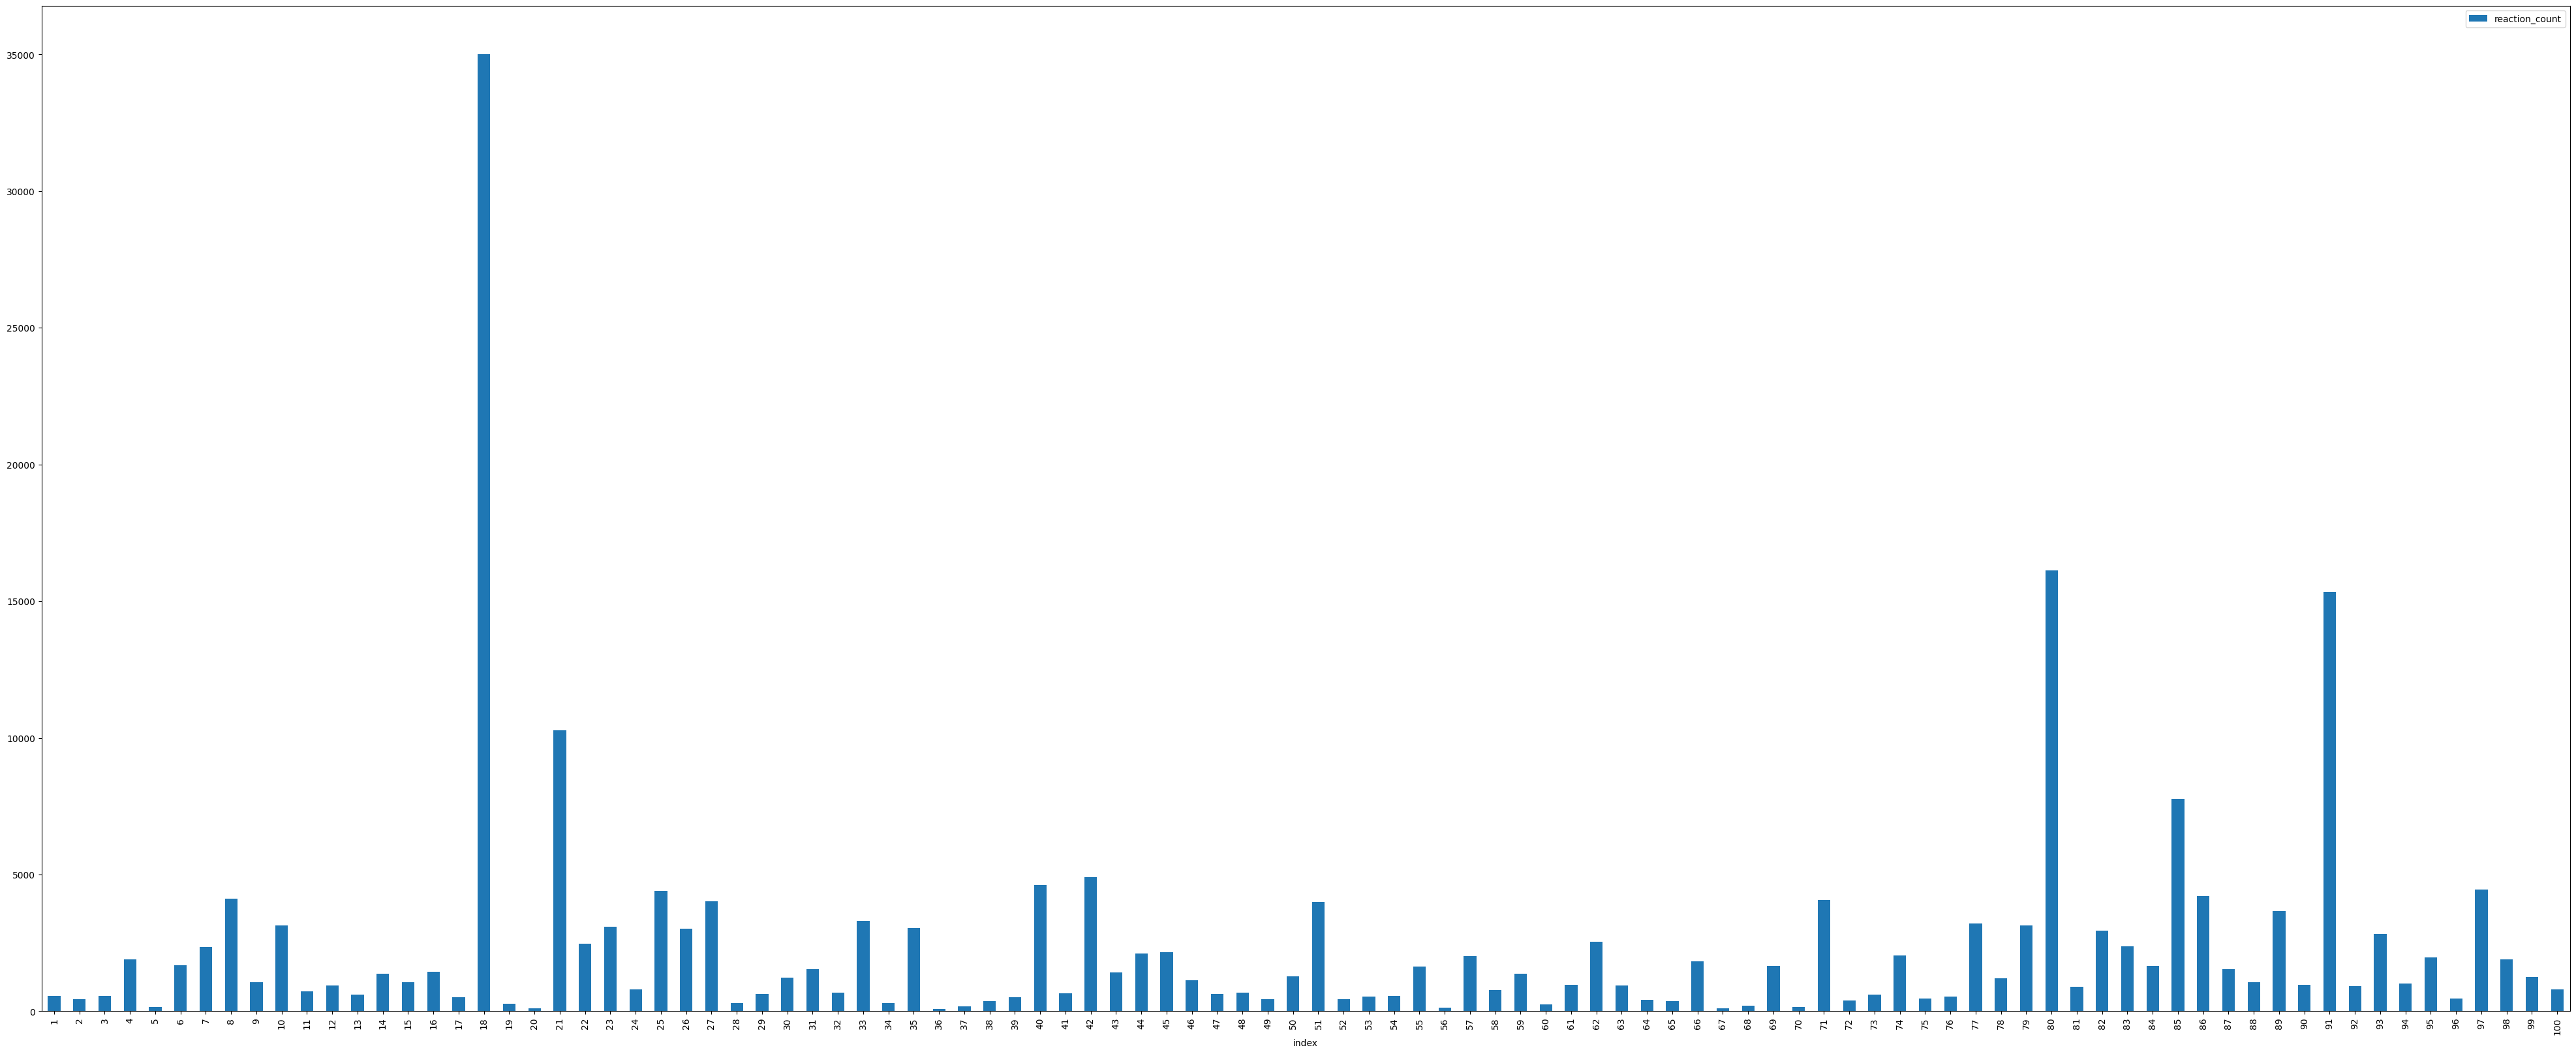

In [4]:
# biểu đồ số lượng reaction của từng bài đăng
reaction_df.plot(kind = "bar", x = "index", y = "reaction_count", figsize = (50,20))

<Axes: xlabel='index'>

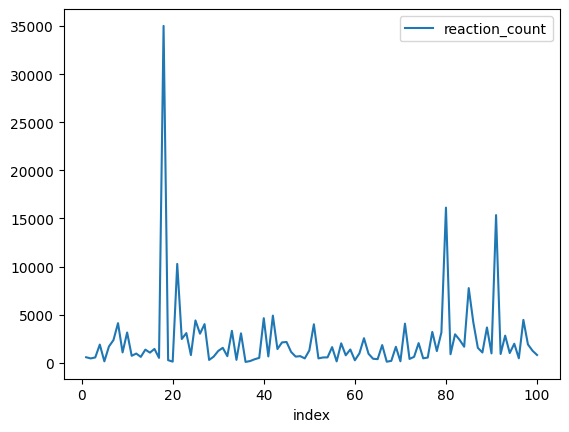

In [5]:
# biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian
reaction_df.plot(kind = "line", x = "index", y = "reaction_count")

In [6]:
# tổng số lượng reaction
sum(reaction_df.reaction_count)

228753

In [7]:
# Số lượng reaction của các bài đăng dao động trong khoảng
reaction_df['reaction_count'].median()

1165.0

In [8]:
#reactions, comments, shares của post mới nhất
first_row = reaction_df.iloc[0]
selected_columns = ['post_text','reaction_count', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']
desired_values = first_row[selected_columns]
desired_values

post_text         TRÒN 1 NĂM DIỄN RA KOSMIK 💥☄️\nMột trải nghiệm...
reaction_count                                                  567
comments                                                          6
shares                                                            6
like                                                            446
love                                                            111
haha                                                            1.0
wow                                                             3.0
care                                                            6.0
sad                                                             0.0
angry                                                           0.0
Name: 0, dtype: object

In [9]:
# Bài đăng nhiều reaction nhất
max_reaction_post = reaction_df.index[reaction_df['reaction_count'] == reaction_df['reaction_count'].max()]
max_reaction_post

Index([17], dtype='int64')

In [10]:
reaction_df.iloc[max_reaction_post]

,index,post_id,post_text,date,reaction_count,comments,shares,like,love,haha,wow,care,angry,sad
17,18,899498471772194,"Trước mắt thấy là có 5 phim, còn bao nhiêu nữa...",2023-10-20,35017,274,531,33621,920,410.0,24.0,32.0,0.0,10.0


In [11]:
# Bài đăng ít reaction nhất
min_reaction_post = reaction_df.index[reaction_df['reaction_count'] == reaction_df['reaction_count'].min()]
min_reaction_post

Index([35], dtype='int64')

In [12]:
reaction_df.iloc[min_reaction_post]

,index,post_id,post_text,date,reaction_count,comments,shares,like,love,haha,wow,care,angry,sad
35,36,883617726693602,Touliver is back!\n'BEAT TAAST' Album Vol.01 đ...,2023-09-21,81,4,4,57,24,0.0,0.0,0.0,0.0,0.0


2. Phân tích từng loại lượt reaction

In [13]:
reaction_df

,index,post_id,post_text,date,reaction_count,comments,shares,like,love,haha,wow,care,angry,sad
0,1,910863380635703,TRÒN 1 NĂM DIỄN RA KOSMIK 💥☄️\nMột trải nghiệm...,2023-11-12,567,6,6,446,111,1.0,3.0,6.0,0.0,0.0
1,2,907540044301370,"Space bois & Space girls,\nIts Maroon 5 🔥🔥🔥\nS...",2023-11-05,445,4,0,376,63,0.0,4.0,2.0,0.0,0.0
2,3,906705411051500,'Đan Xinh In Love' = Nhật kí tình Đan 💕\n\n#Bi...,2023-11-03,548,3,21,490,51,2.0,0.0,4.0,1.0,0.0
3,4,906220787766629,Make Binz Da Poet feel loved 💗\n\n#Binz #Touli...,2023-11-02,1884,26,59,1681,186,7.0,1.0,8.0,1.0,0.0
4,5,906176837771024,It's Xuân Đan's world and we're just living in...,2023-11-02,141,2,0,116,23,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,811294883925887,Space Date 3 sẵn sàng vào cuối tuần này 🌪\n\nH...,2023-05-16,458,29,9,333,117,1.0,2.0,5.0,0.0,0.0
96,97,811306187258090,Một sự kết hợp lần đầu tiên 🎸\n\nTouliver x $A...,2023-05-16,4451,74,51,3698,701,5.0,20.0,27.0,0.0,0.0
97,98,810742723981103,Space Jam Volume 01 - Album Release Event Reca...,2023-05-15,1899,5,6,1792,101,1.0,0.0,5.0,0.0,0.0
98,99,810747570647285,Space Date #3 is coming ☄️🌪🔥🌟\nNext stop: KTX ...,2023-05-15,1247,75,11,951,269,0.0,13.0,12.0,1.0,1.0


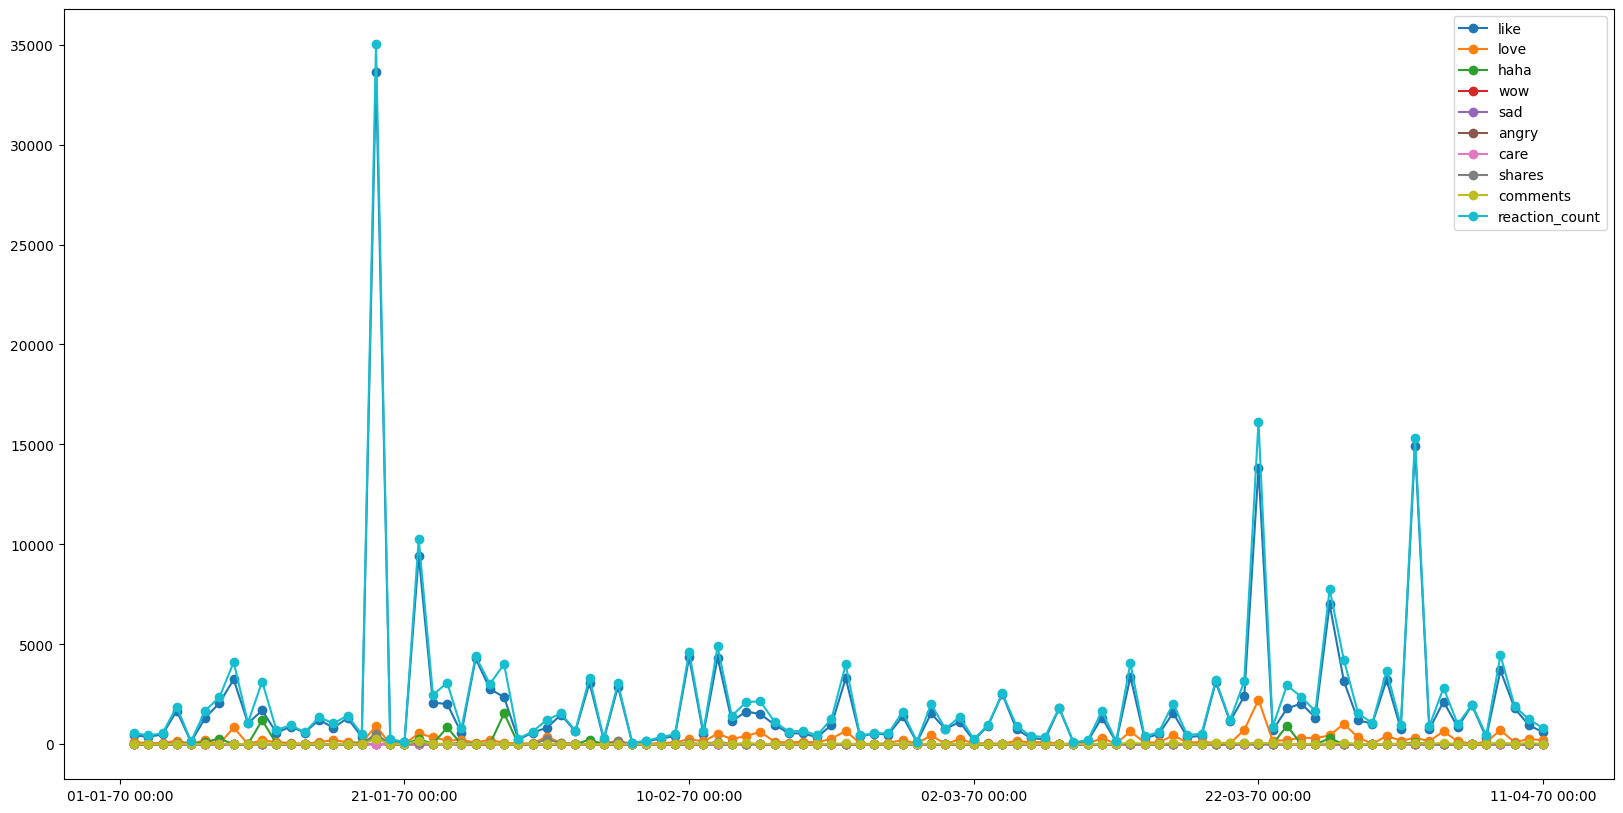

In [14]:
# Biến động của các loại reaction theo thời gian
columns_to_plot = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'shares', 'comments', 'reaction_count']
fig, ax = plt.subplots(figsize=(20, 10))
# Vòng lặp để vẽ từng đường dữ liệu
for column in columns_to_plot:
    ax.plot(reaction_df['index'], reaction_df[column], label=column, marker="o")
plt.legend()
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.show()

3. Tổng từng loại reaction

In [15]:
# dictionary các loại reaction
react_dict = {
    'like': sum(reaction_df.like),
    'love': sum(reaction_df.love),
    'care': sum(reaction_df.care),
    'haha': sum(reaction_df.haha),
    'wow': sum(reaction_df.wow),
    'sad': sum(reaction_df.sad),
    'angry': sum(reaction_df.angry)
}
react_dict

{'like': 198667,
 'love': 22330,
 'care': 731.0,
 'haha': 6628.0,
 'wow': 257.0,
 'sad': 104.0,
 'angry': 36.0}

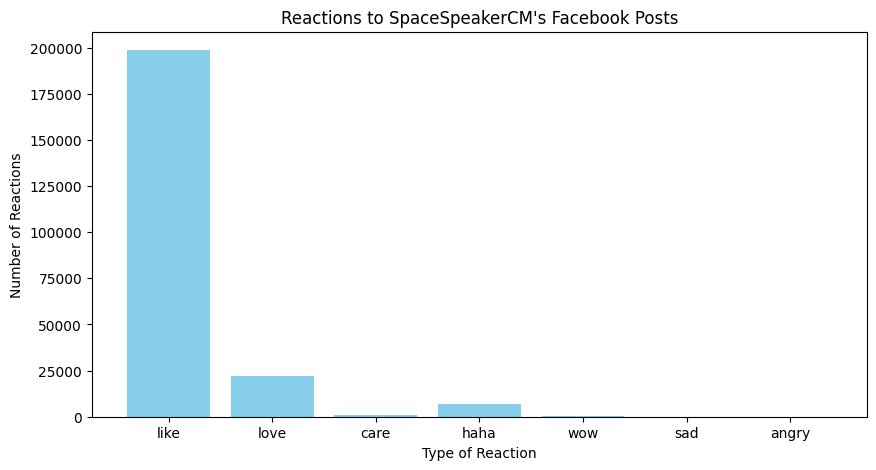

In [16]:
# Số lượng từng loại reaction
fig, ax = plt.subplots(figsize=(10, 5))
# Dữ liệu về các loại phản ứng và số lượng tương ứng
reaction_types = list(react_dict.keys())
reaction_counts = list(react_dict.values())
# Vẽ biểu đồ cột
ax.bar(reaction_types, reaction_counts, color='skyblue')
# Đặt tiêu đề và nhãn cho đồ thị
ax.set_title("Reactions to SpaceSpeakerCM's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.show()

4. Tỉ lệ các loại reaction

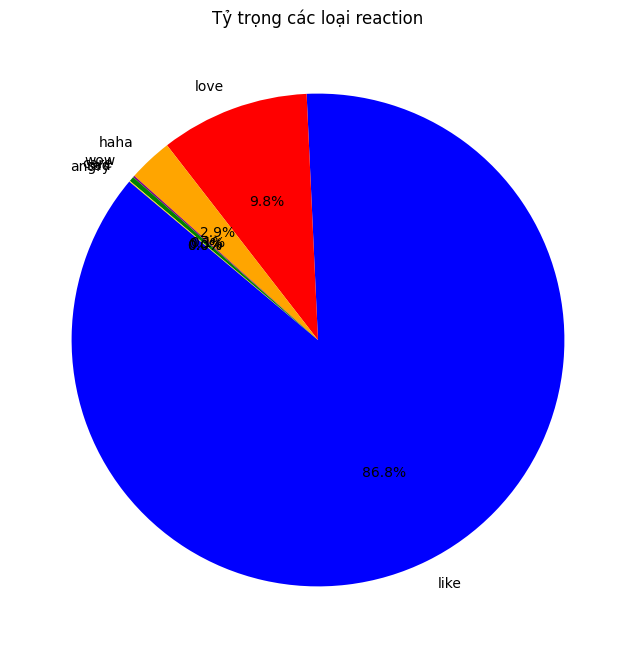

In [17]:
# Tỷ trọng các loại reaction
reaction_columns = ['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']
reaction_totals = reaction_df[reaction_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(reaction_totals, labels=reaction_totals.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'orange', 'purple', 'green', 'yellow', 'brown'])
plt.title('Tỷ trọng các loại reaction')
plt.show()

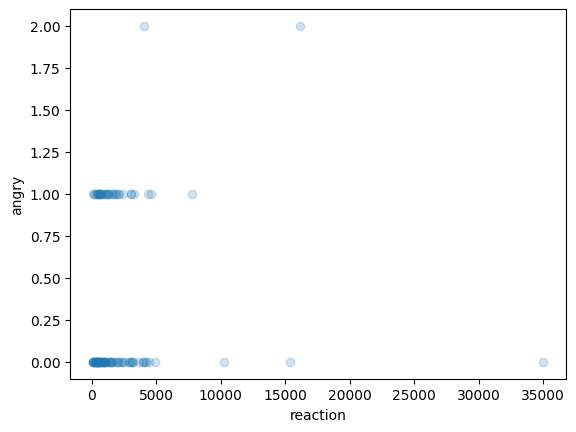

In [18]:
# tương quan giữa các reaction và angry
plt.scatter(reaction_df.reaction_count, reaction_df.angry, alpha = 0.2)
plt.xlabel("reaction")
plt.ylabel("angry")
plt.show()

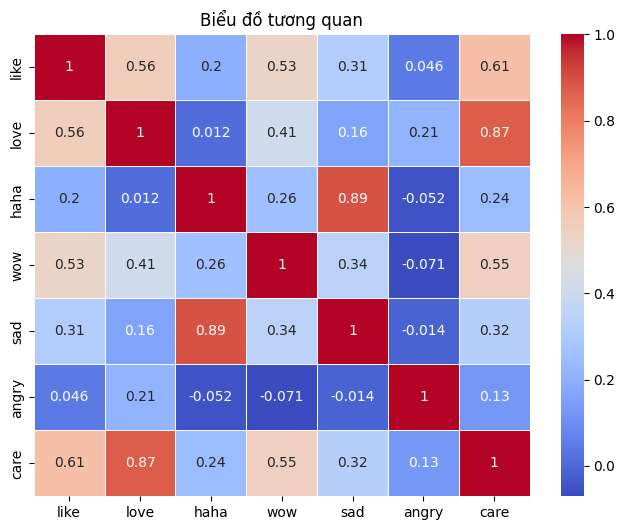

In [19]:
# Lập biểu đồ tương quan
data_reations = reaction_df[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care']]
# Tính ma trận tương quan
data_for_corr = data_reations.corr()
# Ma trận tương quan giữa các reactions với nhau
plt.figure(figsize=(8, 6))
sns.heatmap(data_for_corr, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Biểu đồ tương quan")
plt.show()

## II. Phân tích các lượt Comment

In [20]:
raw_df = pd.read_csv('Data/SpaceSpeakersCM.csv')

In [21]:
comment_df = pd.read_csv('CleanFile/SpaceSpeakersCM_Comment.csv')
comment_df

,index,post_id,comment_id,comment_text,comment_time
0,1,906705411051500,711696274173130,1 trong những lần đầu tiên ???,2023-11-10 00:00:00
1,2,906220787766629,298534133101343,Stream EP ‘Đan Xinh In Love’: https://\nwww.yo...,2023-11-02 00:00:00
2,3,906220787766629,327822609859667,Pre-order 'Đan Xinh In Love' Box Set: http://\...,2023-11-02 00:00:00
3,4,906220787766629,1379789782968425,Thanh Thanh chuẩn luôn :)),2023-11-14 00:00:00
4,5,906220787766629,906150937742787,Xem nhạc .coi nhạc.. chứ nghe gì troi,2023-11-09 00:00:00
...,...,...,...,...,...
501,502,809162270805815,768591594773872,Mê Nắng lên,2023-05-16 00:00:00
502,503,809162270805815,975395050491853,Ông bố Tây Hồ ở team Thổ mà ko thấy góp giọng ...,2023-05-16 00:00:00
503,504,809162270805815,200314192379509,Nắng lên vs Thổ Cypher ạ :(((,2023-05-16 00:00:00
504,505,809162270805815,606276281469477,Ai k nghe full album phí... 🤣,2023-05-16 00:00:00


In [22]:
# thêm index cho dataframe
raw_df = raw_df.reset_index(inplace = False)
raw_df["index"] = raw_df["index"] + 1

<Axes: xlabel='index'>

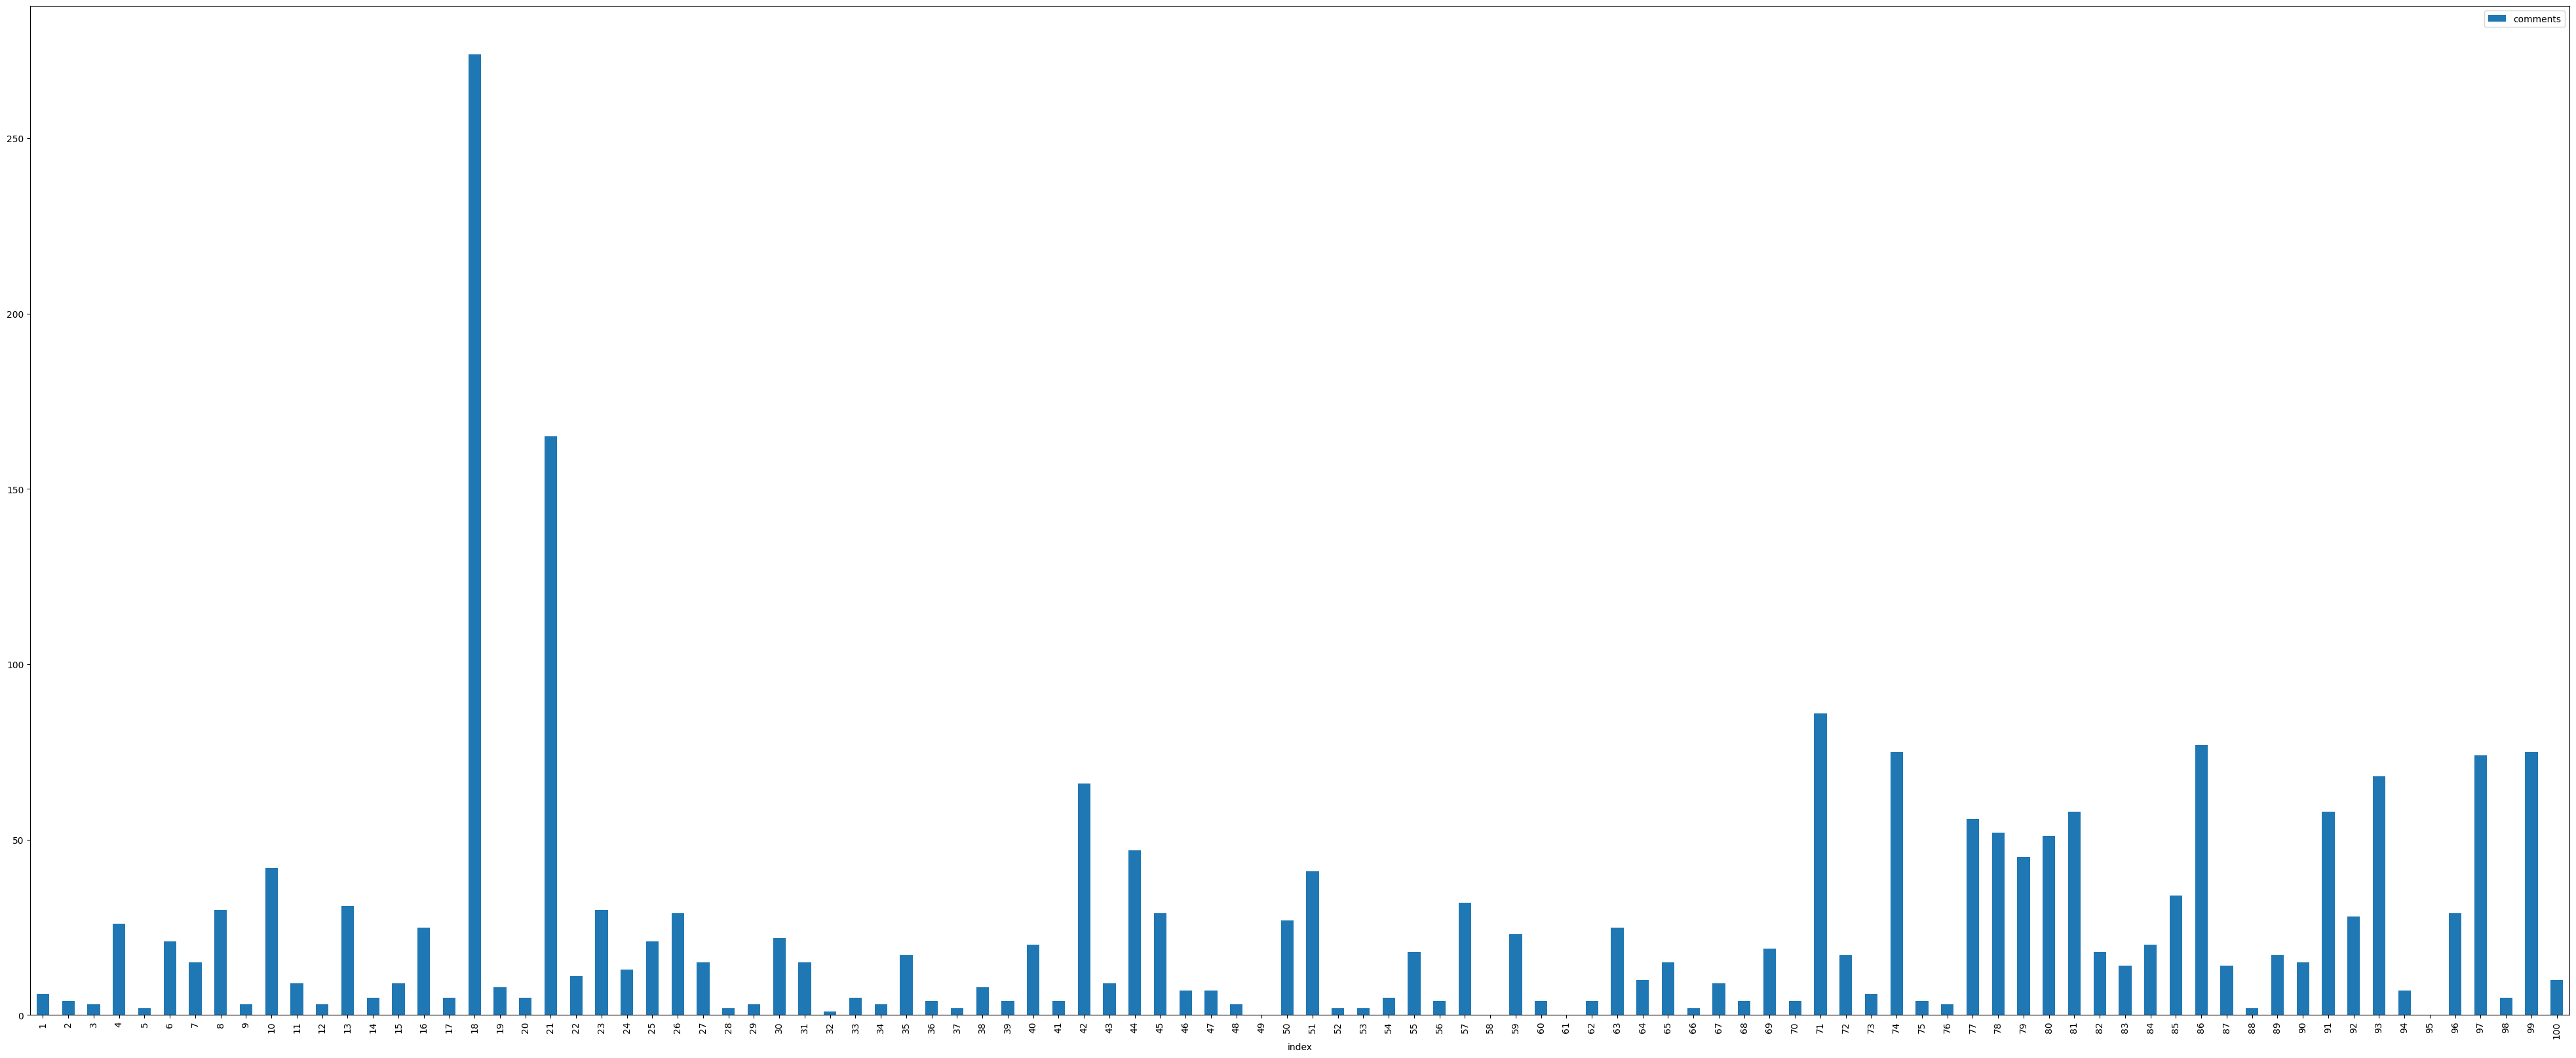

In [23]:
# Biểu đồ số lượng comment của từng bài đăng
raw_df.plot(kind = "bar", x = "index", y = "comments", figsize = (50, 20))

In [24]:
# Bài post có lượng comment cao nhất
max_comment_row = raw_df.loc[raw_df["comments"].idxmax()]
print(f"Content: \n{max_comment_row['text']}")
print(f"Reactions: {max_comment_row['reaction_count']}")
print(f"Comment: {max_comment_row['comments']}")
print(f"Like: {max_comment_row['likes']}")
print(f"Share: {max_comment_row['shares']}")


Content: 
Trước mắt thấy là có 5 phim, còn bao nhiêu nữa nhỉ? 🤨

#Binz #Touliver #SSLabel #HitMeUp #DanXinhInLove #WarnerMusicVietnam
Reactions: 35017
Comment: 274
Like: 33621
Share: 531


In [25]:
# Bài post có lượng comment thấp nhất
min_comment_row = raw_df.loc[raw_df["comments"].idxmin()]
print(f"Content: \n{min_comment_row['text']}")
print(f"Reactions: {min_comment_row['reaction_count']}")
print(f"Comment: {min_comment_row['comments']}")
print(f"Like: {min_comment_row['likes']}")
print(f"Share: {min_comment_row['shares']}")


Content: 
'55 RADAR' OFFICIAL POSTER

55 RADAR - chuỗi dự án âm nhạc dài hơi được thực hiện bởi SS Label nhằm tìm kiếm, hoàn thiện và phát hành âm nhạc cho những nghệ sĩ trẻ tiềm năng 👽📡

1st song & artist
20:00 | 24.08.2023
STAY TUNED.

#55Radar #SSLabel
Reactions: 448
Comment: 0
Like: 355
Share: 12


In [26]:
# Số lượng comment của các bài đăng dao động trong khoảng
raw_df.comments.median()

13.5

<Axes: xlabel='index'>

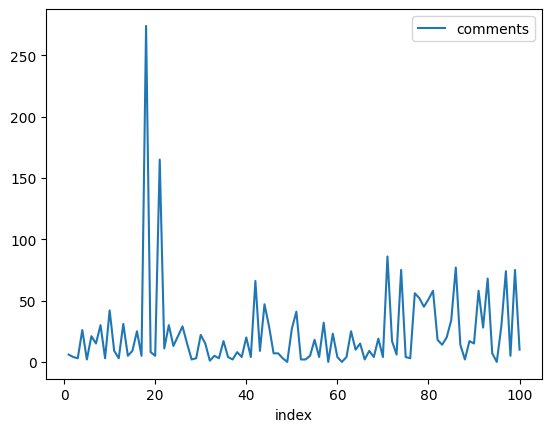

In [27]:
# Biến động số lượt comment qua từng bài đăng
raw_df.plot(kind = "line", x = "index", y = "comments")

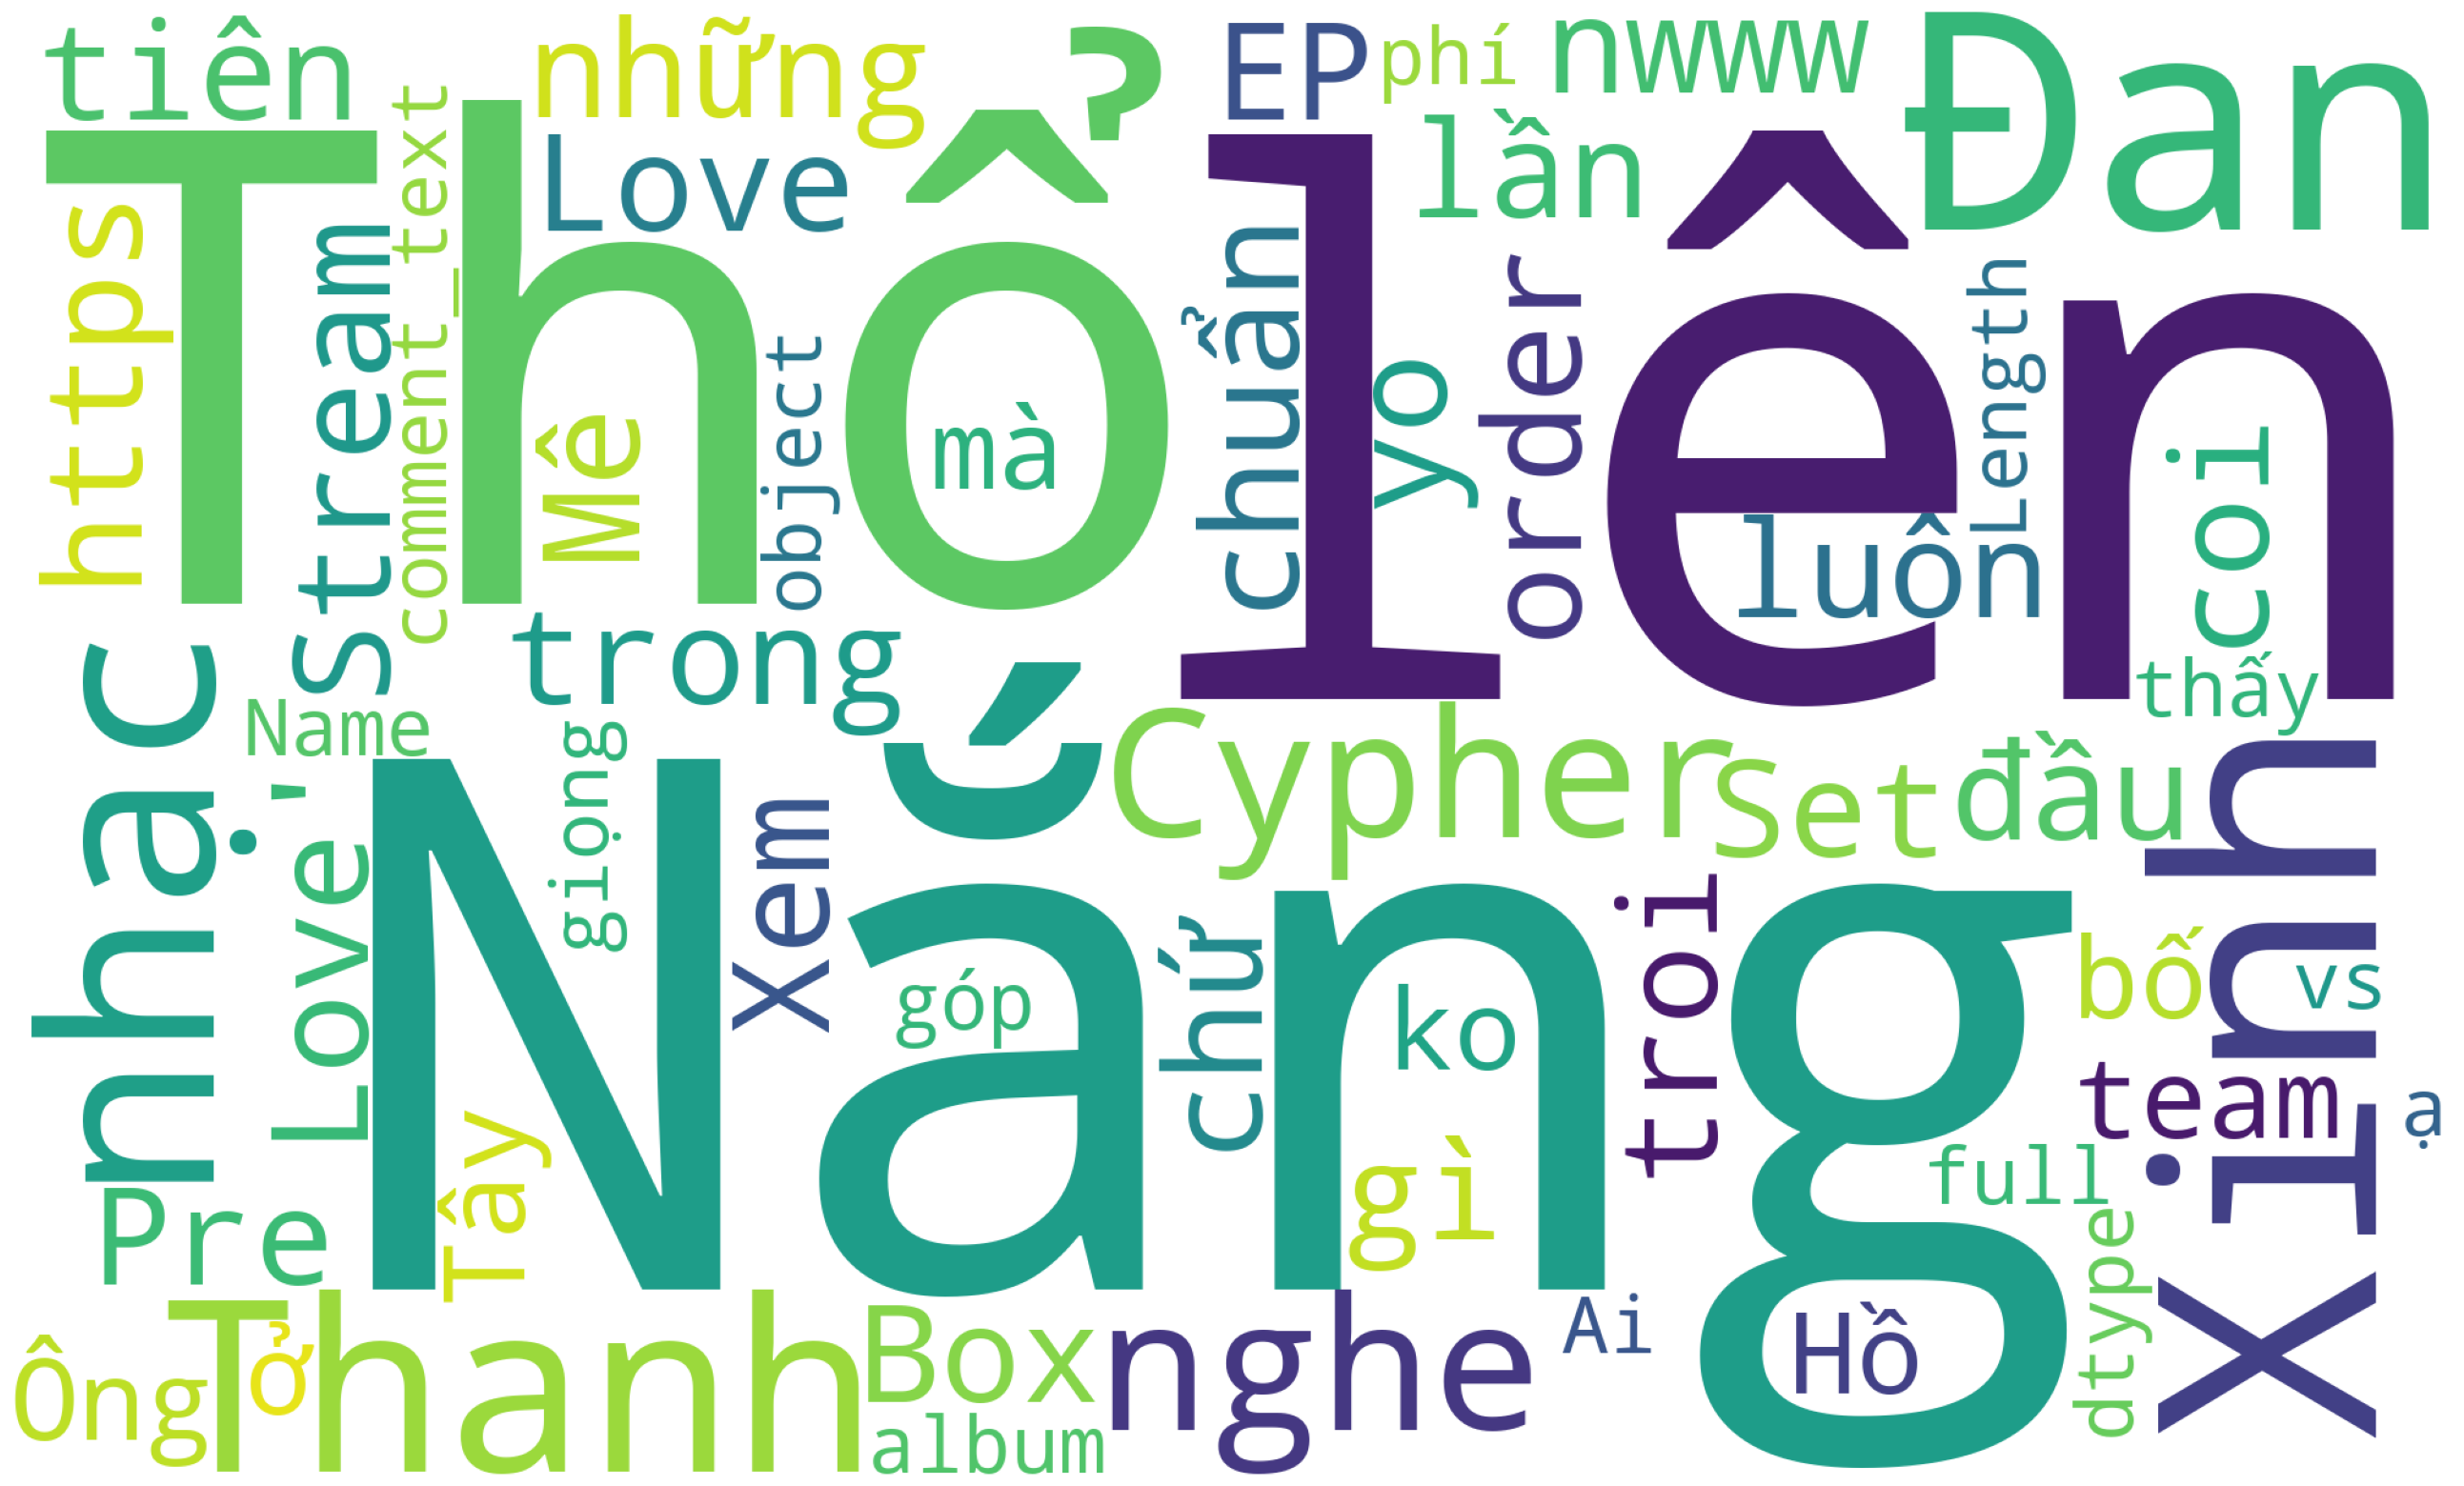

In [28]:
comment_text = comment_df['comment_text']
from wordcloud import WordCloud, STOPWORDS
#Tạo wordclould cho các comment
text_binz = str(comment_text)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text_binz)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## III. Phân tích các lượt Share

<Axes: xlabel='index'>

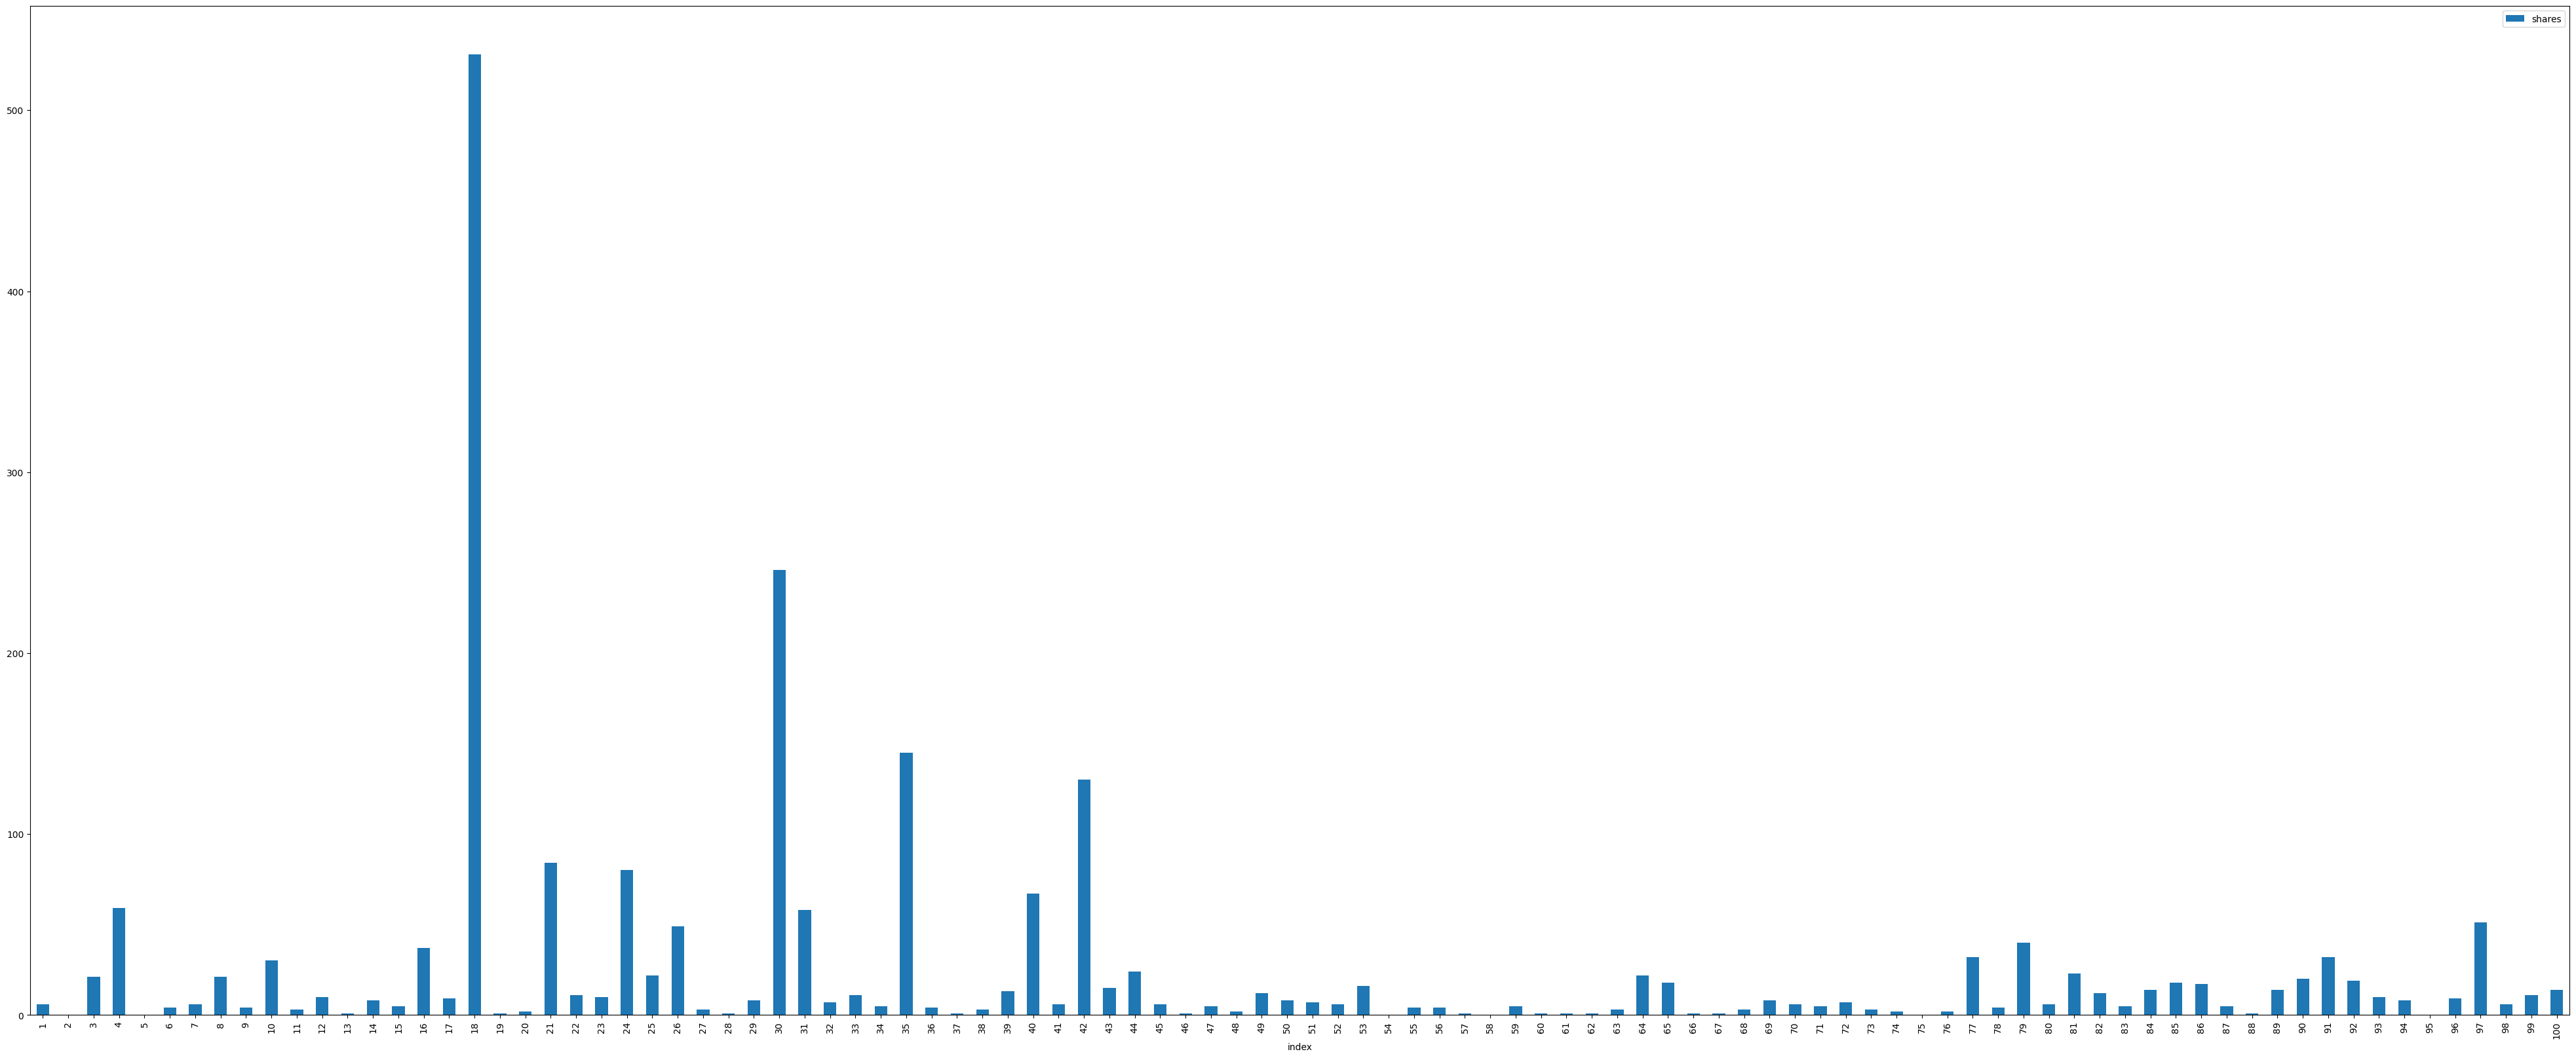

In [29]:
# Biểu đồ số lượng share của từng bài đăng
raw_df.plot(kind = "bar", x = "index", y = "shares", figsize = (50, 20))

In [30]:
# Tổng lượt share
sum(raw_df.shares)

2293

In [31]:
# Lượt share dao động trong khoảng
raw_df.shares.median()

7.0

In [32]:
# Bài đăng có nhiều share nhất
max_comment_row = raw_df.loc[raw_df["shares"].idxmax()]
print(f"Content: \n{max_comment_row['text']}")
print(f"Reactions: {max_comment_row['reaction_count']}")
print(f"Comment: {max_comment_row['comments']}")
print(f"Like: {max_comment_row['likes']}")
print(f"Share: {max_comment_row['shares']}")

Content: 
Trước mắt thấy là có 5 phim, còn bao nhiêu nữa nhỉ? 🤨

#Binz #Touliver #SSLabel #HitMeUp #DanXinhInLove #WarnerMusicVietnam
Reactions: 35017
Comment: 274
Like: 33621
Share: 531


In [33]:
# Bài đăng có ít share nhất
min_comment_row = raw_df.loc[raw_df["shares"].idxmin()]
print(f"Content: \n{min_comment_row['text']}")
print(f"Reactions: {min_comment_row['reaction_count']}")
print(f"Comment: {min_comment_row['comments']}")
print(f"Like: {min_comment_row['likes']}")
print(f"Share: {min_comment_row['shares']}")

Content: 
Space bois & Space girls,
Its Maroon 5 🔥🔥🔥
See ya in PhuQuoc.

#Vinwonders #Vinfast #Maroon5
Reactions: 445
Comment: 4
Like: 376
Share: 0


<Axes: xlabel='index'>

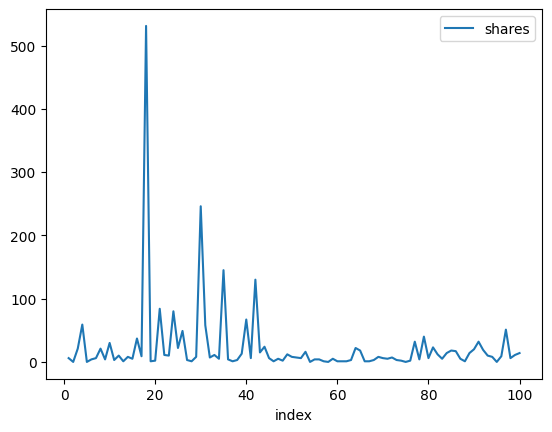

In [34]:
#   
raw_df.plot(kind = "line", x = "index", y = "shares")

## Tương quan giữa reactions, comments và share

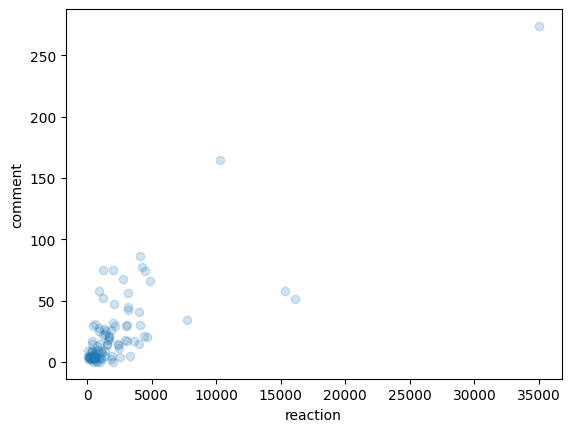

In [35]:
# Tương quan giữa reaction và comment
plt.scatter(reaction_df.reaction_count, reaction_df.comments, alpha = 0.2)
plt.xlabel("reaction")
plt.ylabel("comment")
plt.show()

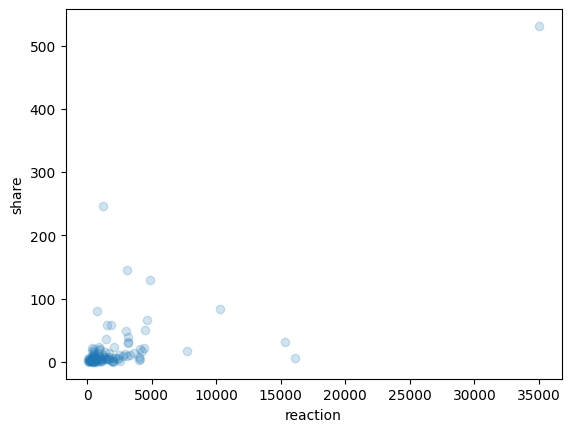

In [36]:
# Tương quan giữa reaction và share
plt.scatter(reaction_df.reaction_count, reaction_df.shares, alpha = 0.2)
plt.xlabel("reaction")
plt.ylabel("share")
plt.show()

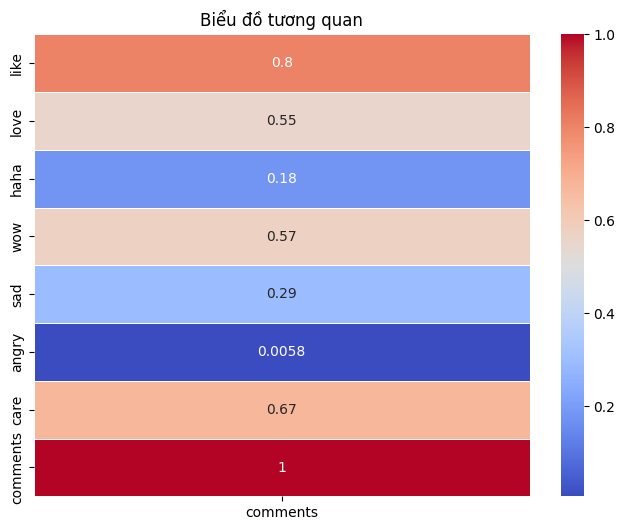

In [37]:
# Lập biểu đồ tương quan
data_reations = reaction_df[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments']]
data_for_corr = data_reations.corr()
# Lấy ma trận tương quan của 'comments' với các biến khác
correlation_with_comments = data_for_corr['comments'].to_frame()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Biểu đồ tương quan")
plt.show()

Text(0, 0.5, 'Total')

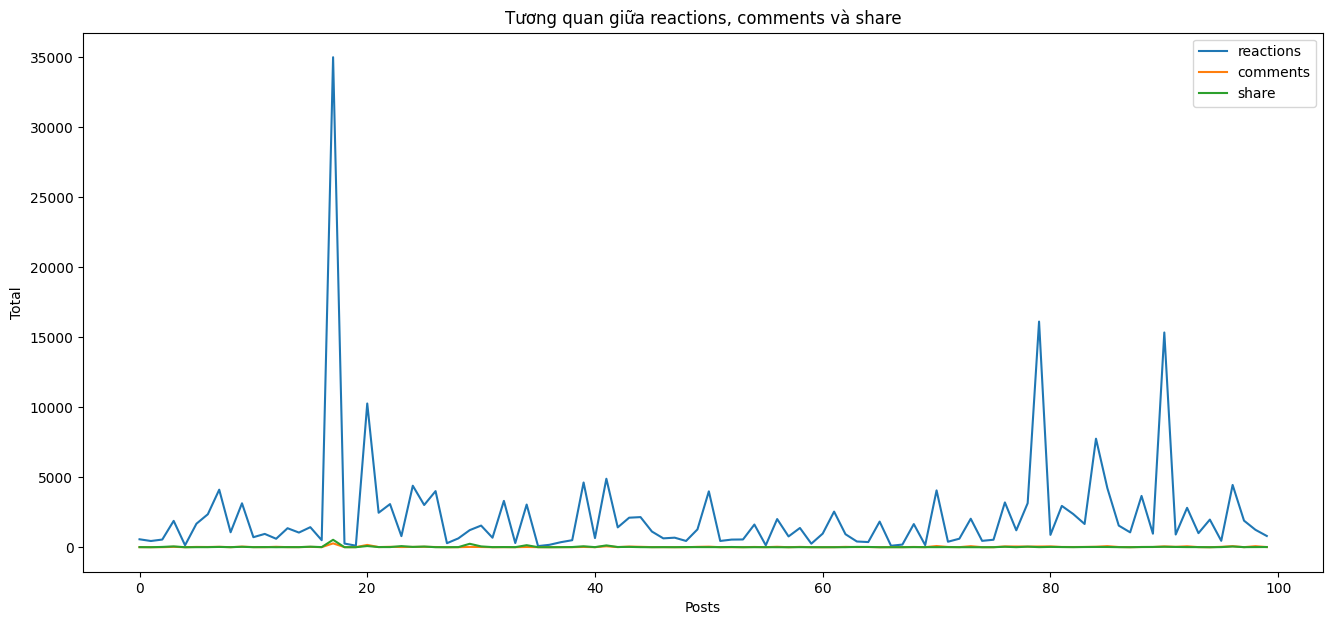

In [38]:
fig, ax = plt.subplots(1,1)
ax.plot(raw_df['reaction_count'],label = 'reactions')
ax.plot(raw_df['comments'], label = 'comments')
ax.plot(raw_df['shares'],label = 'share')
ax.legend()
fig.set_figwidth(16)
fig.set_figheight(7)
ax.set_title("Tương quan giữa reactions, comments và share")
ax.set_xlabel("Posts")
ax.set_ylabel("Total")